# Deloitte contact strategy project
## Lisa Aita, Roberto Colangelo, Leonardo Petroni, Davide Rosatelli

### Introduction and data exploration

We started, as usual, importing all the necessary libraries and importing the csv provided as dataframe with pandas.\
The dataset is made up of 60578 rows and 64 columns. We carefully analyzed the data, identifying the most important and least understandable variables; and for each numeric column we also observed the main summary statistics.

Trying to make visualization for some variables, we noticed that in most of the columns the values are very skewed, meaning that most of the rows have similar values (often 0) in many of the variables. Successively we drew two piecharts related to the different values of the variables 'GENDER' and 'BEHAVIOUR_SCORE' in order to better comprehend the customer set.

In [1]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection  import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
import sklearn.metrics
import tensorflow as tf
import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import random

In [2]:
#importing the dataset
df=pd.read_csv('DLT_AI_and_DATA_CUSTOMER_BASE_EN.csv',sep=';',encoding='ISO-8859-1')
df

,ID,GENRE,CONSENSUS_PRIVACY,LOYALTY_PROGRAM,LAST_MONTH_DESK_VISITS,LAST_3MONTHS_DESK_VISITS,LAST_YEAR_DESK_VISITS,LAST_MONTH_CC_REQUESTS,LAST_3MONTHS_CC_REQUESTS,LAST_YEAR_CC_REQUESTS,...,N_DEM_SOLUTION,N_SMS_SOLUTION,N_TLS_SOLUTION,YEAR_BIRTH,BEHAVIOUR_SCORE,CLC_STATUS,ACQUISITION_CHANNEL,LAST_GAS_PRODUCT,LAST_POWER_PRODUCT,LAST_CAMPAIGN_TIPOLOGY
0,10,M,YES,1,0,0,0,0,0,10,...,0,0,0,1959,GOOD PAYER,4-Risk churn,CC,Traditional,NaN,Cross-Selling
1,20,F,NO,1,0,0,0,0,0,0,...,0,0,0,1962,GOOD PAYER,3-Customer Loyalty,CC,Traditional,NaN,Communication
2,22,F,YES,0,0,0,0,0,0,0,...,0,0,0,1960,LATECOMER,2-Customer,CC,Traditional,NaN,Cross-Selling
3,26,M,YES,1,0,0,0,0,0,0,...,0,0,0,1924,GOOD PAYER,2-Customer,CC,Traditional,NaN,Cross-Selling
4,32,F,YES,0,0,0,0,0,0,1,...,0,0,0,1967,GOOD PAYER,2-Customer,CC,Traditional,NaN,Cross-Selling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60573,430297,M,YES,0,0,0,0,0,0,0,...,0,0,0,1943,GOOD PAYER,2-Customer,CC,Traditional,NaN,Cross-Selling
60574,430300,M,YES,1,0,0,0,0,0,0,...,0,0,0,1947,GOOD PAYER,2-Customer,CC,Traditional,NaN,Cross-Selling
60575,430304,F,YES,1,0,0,0,0,0,0,...,0,0,0,1971,GOOD PAYER,2-Customer,CC,Traditional,NaN,Cross-Selling
60576,430305,M,YES,1,0,0,0,0,0,2,...,0,0,0,1966,GOOD PAYER,4-Risk churn,CC,Traditional,NaN,Cross-Selling


In [3]:
#summary descriptive statistics
df.describe()

,ID,LOYALTY_PROGRAM,LAST_MONTH_DESK_VISITS,LAST_3MONTHS_DESK_VISITS,LAST_YEAR_DESK_VISITS,LAST_MONTH_CC_REQUESTS,LAST_3MONTHS_CC_REQUESTS,LAST_YEAR_CC_REQUESTS,SOLUTIONS,N_GAS_POINTS,...,N_DEM_RENEWAL,N_SMS_RENEWAL,N_TLS_RENEWAL,N_DEM_CROSS_SELLING,N_SMS_CROSS_SELLING,N_TLS_CROSS_SELLING,N_DEM_SOLUTION,N_SMS_SOLUTION,N_TLS_SOLUTION,YEAR_BIRTH
count,60578.000000,60578.000000,60578.000000,60578.000000,60578.000000,60578.000000,60578.000000,60578.000000,60578.000000,60578.000000,...,60578.000000,60578.0,60578.0,60578.000000,60578.000000,60578.000000,60578.000000,60578.000000,60578.0,60578.000000
mean,213378.983922,0.398214,0.008733,0.017861,0.068457,0.036796,0.087193,0.409059,0.002905,1.025009,...,0.023177,0.0,0.0,0.038050,0.142510,1.015286,0.025686,0.125953,0.0,1951.377216
std,125594.731490,0.489534,0.131052,0.212936,0.554284,0.299037,0.553842,1.494119,0.053823,0.180477,...,0.214126,0.0,0.0,0.298438,0.435759,0.490325,0.240577,0.451028,0.0,15.956064
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1898.000000
25%,102515.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1938.000000
50%,213236.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1951.000000
75%,322660.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1964.000000
max,430317.000000,1.000000,8.000000,10.000000,36.000000,13.000000,25.000000,62.000000,1.000000,8.000000,...,8.000000,0.0,0.0,8.000000,8.000000,4.000000,6.000000,8.000000,0.0,1997.000000


In [4]:
#gender piechart
pie=df.groupby('GENRE').size().to_frame('count').reset_index()
colors=['pink','lightblue']
fig1= px.pie(pie, values='count', names='GENRE', title='Customers by gender',color_discrete_map={
                                'M':'royalblue',
                                 'F':'pink'},color='GENRE')
fig1.update_traces(hoverinfo = 'label+percent', textfont_size = 12,
                  textinfo = 'label+percent', pull = [ 0.1])
fig1.show()
# This is an interactive graph, if you click on the points in the legend you can remove or add the groups

In [5]:
#behaviour score piechart
piebehaviour=df.groupby('BEHAVIOUR_SCORE').size().to_frame('Somma').reset_index()
fig1= px.pie(piebehaviour, values='Somma', names='BEHAVIOUR_SCORE', title="Customers' behaviour score",color_discrete_map={
                                'BAD PAYER':'red',
                                 'GOOD PAYER':'green',
                                 'LATECOMER':'orange'},color='BEHAVIOUR_SCORE')
fig1.update_traces(hoverinfo = 'label+percent', textfont_size = 12,
                  textinfo = 'label+percent', pull = [0.05, 0.05, 0.05])
fig1.show()
# This is an interactive graph,if you click on the points in the legend you can remove or add the groups

### Data Preprocessing and Feature engineering

In this section we performed some data preprocessing steps, modifying or deleting some variables.\
At first, we kept only the rows corresponding to customers that give privacy consensus for marketing purposes and deleted all the rows that had a 'NO' in that column.\
Then, in some columns, we needed to translate the strings to English, since they had instances in both Italian and English.\
A few other variables, like 'BEHAVIOUR_SCORE' and 'GENRE', were trasformed from categorical to dummy or ordinal numeric variables.\
We started to delete some variables for many different reasons:most of the istances had null values, others had as unique value 0, and others were simply repetitive or completely irrelevant for our analysis.

Our aim is that of identifying the propensity of customers to buy one of the proposed solution, and the column 'SOLUTION' indicates if they already accepted one of them once, so it will be the target of our analysis.

At the end of this section we performed the first partition in the dataset according to the column 'COMMODITY', that we used to divide the costumers according to the service that will be offered to them, namely 'CROSS' or 'DUAL'.

In [36]:
#Eliminating all the clients which did not give privacy consensus for marketing purposes from the dataframe 
dfc=df.copy()
def privacy_consensus(df):
    labels=[]
    for el in range(0,len(df.iloc[:,0])):
        if df.iloc[el,2]=='NO':
            labels.append(el)
    df.drop(labels, axis=0, inplace=True)
    df
privacy_consensus(dfc)


In [7]:
#Checking null values
MVpercentages = (dfc.isnull().sum()/dfc.shape[0]).sort_values(ascending=False)
print(MVpercentages.head(10))

LAST_POWER_PRODUCT           0.988908
DATE_LAST_VISIT_DESK         0.873771
DATE_LAST_REQUEST_CC         0.379008
LAST_GAS_PRODUCT             0.000344
CONSENSUS_PRIVACY            0.000046
AVG_CONSUMPTION_GAS_M3       0.000046
AVG_CONSUMPTION_POWER_KWH    0.000046
ZONE                         0.000046
AREA                         0.000046
N_CAMPAIGN_CLICKED           0.000000
dtype: float64


In [8]:
dfc['LAST_CAMPAIGN_TIPOLOGY'] = dfc['LAST_CAMPAIGN_TIPOLOGY'].str.replace('Comunicazione', 'Communication')
dfc['LAST_CAMPAIGN_TIPOLOGY'] = dfc['LAST_CAMPAIGN_TIPOLOGY'].str.replace('Rinnovo', 'Renewal')
#dfc['N_SMS_RENEWAL'].unique()
#dfc['N_TLS_RENEWAL'].unique()
#dfc['NEW_CUSTOMER'].unique()
#All this variables have as unique value 0 so are useless 
dfc['BEHAVIOUR_SCORE']=dfc['BEHAVIOUR_SCORE'].str.replace('GOOD PAYER','2')
dfc['BEHAVIOUR_SCORE']=dfc['BEHAVIOUR_SCORE'].str.replace('LATECOMER','1')
dfc['BEHAVIOUR_SCORE']=dfc['BEHAVIOUR_SCORE'].str.replace('BAD PAYER','0')
dfc['BEHAVIOUR_SCORE']=dfc['BEHAVIOUR_SCORE'].astype(int)


In [9]:
le=preprocessing.LabelEncoder()
dfc=pd.get_dummies(dfc, columns=["CLC_STATUS"])
dfc['GENRE'] = le.fit_transform(dfc['GENRE'])
#ZONE Deleted since it has the same relevance of the column AREA
#deleting some repetitive or irrelevant columns 
dfc = dfc.drop(['LAST_MONTH_DESK_VISITS','LAST_3MONTHS_DESK_VISITS', 'CONSENSUS_PRIVACY', 'LAST_MONTH_CC_REQUESTS', 'LAST_3MONTHS_CC_REQUESTS', 'INBOUND_CONTACTS_LAST_2MONTHS', 'INBOUND_CONTACTS_LAST_MONTH', 'LAST_POWER_PRODUCT', 'DATE_LAST_VISIT_DESK', 'N_RISK_CASES_CHURN_GAS', 'N_RISK_CASES_CHURN_POWER', 'DATE_LAST_REQUEST_CC','N_TLS_RENEWAL','N_SMS_RENEWAL','NEW_CUSTOMER','SUPPLY_START_DATE','DATE_LAST_CAMPAIGN','FIRST_ACTIVATION_DATE','ZONE','N_DISUSED_GAS_POINTS','N_DISUSED_POWER_POINTS','N_TERMINATED_GAS_PER_SWITCH','N_TERMINATED_POWER_PER_SWITCH','N_TERMINATED_GAS_PER_VOLTURA','N_TERMINATED_POWER_PER_VOLTURA','WEB_PORTAL_REGISTRATION'], axis=1)

In [10]:
dfc['SOLUTIONS'].value_counts()
#Most of the customers didn't buy a solution the last time 

0    43536
1       99
Name: SOLUTIONS, dtype: int64

In [11]:
#Initial dataframe split between customers according to the product they have already purchased
df_dual = dfc[dfc['COMMODITY']=='DUAL'] #Customers who have both the commodities (Dual Customers)
df_cross =dfc.loc[dfc['COMMODITY'].isin(['GAS','POWER'])] #Customers who have only one of the two commodities (Cross Customers)

## Propensity modeling

In this section we built some Propensity models with different algorithms in order to identify the likelihood of the customers to accept or not the proposed solution when contacted.\
These models have as target the prediction of the column 'SOLUTION' and provide as output a propensity score, which is a probabilistic estimation of how likely a column is 1.

We started by plotting a correlation matrix and displaying the most correlated features with the target 'SOLUTION'. However,it looked like the column 'SOLUTIONS' didn't have a significant correlation with any other variable. For this reason, we proceeded by selecting manually and logically the variables used to train the model.

For each of the two gruop of customers (those 43166 who wil receive a cross-selling offer and those 469 who will receive a solution offer), we have tested four algorithms for the propensity models:
- A logistic regression with scaled data
- A logistic regression with non scaled data
- A neural network for binary classification with scaled data
- A neural network for binary classification with non scaled data

As espected, the neural network produced an higher accuracy, but the result produced were overfitting the data.Therefore the propensity scores outputted by the model were all equal or really close to 0. For our purpose, the best model in both cases is the one trained with the logistic regression without scaling the data, since it had an acceptable accuracy (around 0.8 for cross and 0.93 for dual) and produced a wider range of propensity scores, that will allow us to divide the customers in groups.\
In the code below the chosen model is the uncommented one, and the propensity scores produced are visualized in the two histograms.

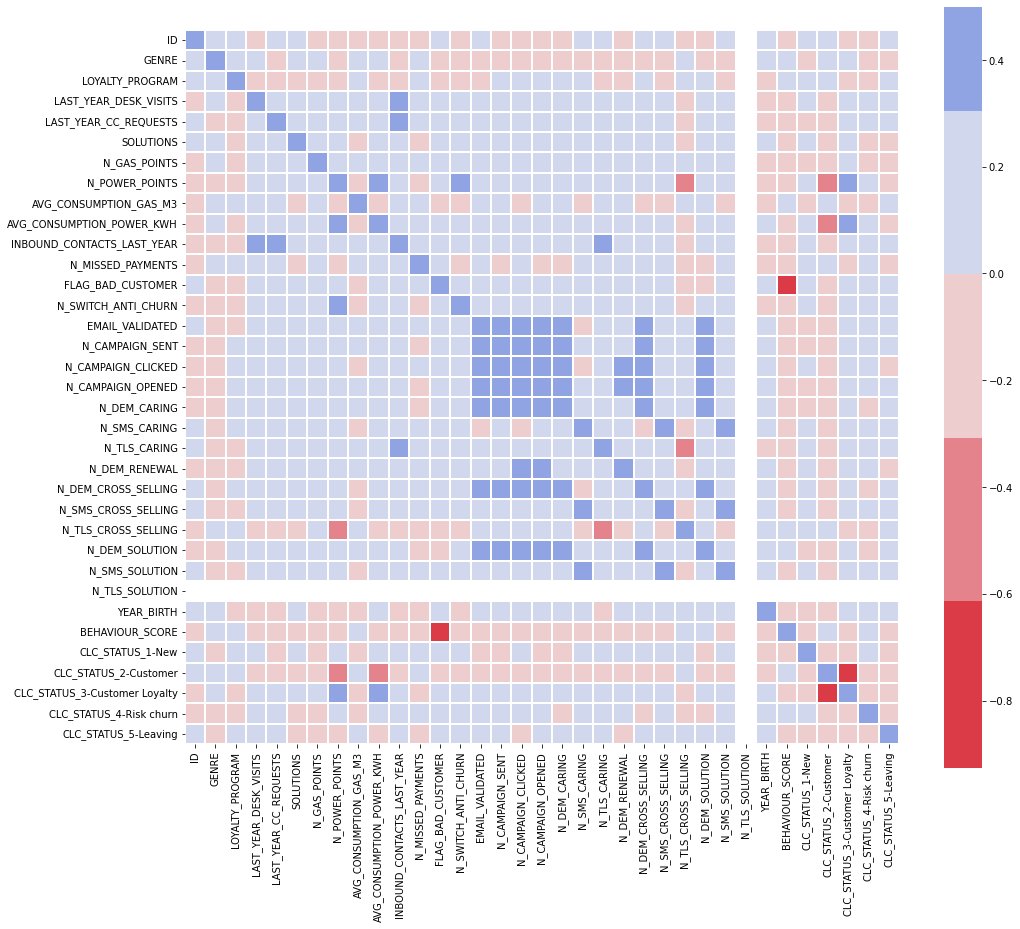

In [12]:
corr=dfc.corr()
plt.figure(figsize=(16, 14))
cmap=sns.diverging_palette(10,260)
sns.heatmap(corr, vmax=0.5, center=0,square=True, linewidths=2, cmap=cmap)
plt.show()
#Correlation matrix to choose the most relevant attributes for our propensity models but it looks like the column 'SOLUTIONS' doesn't really have a correlation with any other variable 
#We will select the variables by hand 

In [13]:
dfc.corrwith(dfc["SOLUTIONS"]).sort_values(ascending=False).head(10)
#not significant correlations

SOLUTIONS                        1.000000
N_POWER_POINTS                   0.120660
AVG_CONSUMPTION_POWER_KWH        0.115156
INBOUND_CONTACTS_LAST_YEAR       0.098218
CLC_STATUS_3-Customer Loyalty    0.079220
N_SMS_CARING                     0.078594
LAST_YEAR_CC_REQUESTS            0.077651
LAST_YEAR_DESK_VISITS            0.071520
N_SMS_CROSS_SELLING              0.069379
N_TLS_CARING                     0.056881
dtype: float64

### CROSS-SELLING CUSTOMERS

In [14]:
df_cross['SOLUTIONS'].value_counts()

0    43096
1       70
Name: SOLUTIONS, dtype: int64

In [15]:
#We drop the unnecessary columns from the independent variables set(they seem both uncorrelated and logically not interesting)
X_cross=df_cross.drop(['SOLUTIONS','COMMODITY','AREA','PHONE_VALIDATED','EMAIL_VALIDATED','LAST_GAS_PRODUCT','LAST_CAMPAIGN_TIPOLOGY','ACQUISITION_CHANNEL','CUSTOMER_SENIORITY','AVG_CONSUMPTION_GAS_M3','AVG_CONSUMPTION_POWER_KWH'],axis=1)
prop=df_cross.copy()
target=prop['SOLUTIONS']
predcross=prop[['BEHAVIOUR_SCORE','GENRE','N_DEM_CROSS_SELLING','N_TLS_CROSS_SELLING','N_SMS_CROSS_SELLING','N_CAMPAIGN_SENT','N_CAMPAIGN_CLICKED']] #Choosing the independent variables for our model
scaler = StandardScaler() #Importing standard scaler to scale data
scaled_data = scaler.fit_transform(predcross)

##### Logistic Regression [Scaled data]

In [16]:
# Propensity model for Cross-selling customers with scaled data 
# X_train, X_test, y_train, y_test  =   train_test_split(scaled_data, target, test_size=.4)
# print( "Predictor - Training : ", X_train.shape, "Predictor - Testing : ", X_test.shape )
# classifier=GaussianNB()
# classifier=classifier.fit(X_train,y_train)
# predictions=classifier.predict(X_test)
# #Analyze accuracy of predictions
# sklearn.metrics.confusion_matrix(y_test,predictions)
# sklearn.metrics.accuracy_score(y_test, predictions)
# df_cross['Propensity'] = classifier.predict_proba(predcross)[:,1].round(1)
# df_cross['Propensity'].hist()
#The spread of probabilites to buy is good but actually we can notice from the target variable the fact that only 70 customers out 43000! bought a solution so most of the probabilities values should be much less than 1

##### Logistic Regression [Non scaled data]

In [17]:
# Propensity model for Cross-selling customers with non-scaled data 
X_train, X_test, y_train, y_test  =   train_test_split(predcross, target, test_size=.4,random_state=23)
print( "Predictor - Training : ", X_train.shape, "Predictor - Testing : ", X_test.shape )
classifier=GaussianNB()
classifier=classifier.fit(X_train,y_train)
predictions=classifier.predict(X_test)
#Analyze accuracy of predictions
sklearn.metrics.confusion_matrix(y_test,predictions)
sklearn.metrics.accuracy_score(y_test, predictions)

Predictor - Training :  (25899, 7) Predictor - Testing :  (17267, 7)


0.7853130248450803

/var/folders/sc/r0jqlfy569scw9syx066s6n80000gn/T/ipykernel_11312/1062192011.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:>

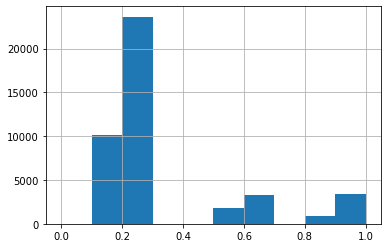

In [18]:
df_cross['Propensity'] = classifier.predict_proba(predcross)[:,1].round(1)
df_cross['Propensity'].hist()

##### Neural Network for binary classification ( 99.8% of accuracy but unusable for our propensity model ) [Scaled data]

In [19]:
#  #Neural network with scaled data
# Y=df_cross['SOLUTIONS']
# X=X_cross[['BEHAVIOUR_SCORE','GENRE','N_DEM_CROSS_SELLING','FLAG_BAD_CUSTOMER','N_MISSED_PAYMENTS','N_TLS_CROSS_SELLING','N_SMS_CROSS_SELLING','N_CAMPAIGN_SENT','N_CAMPAIGN_CLICKED','N_CAMPAIGN_OPENED']]
# X_train, X_test, y_train, y_test  =   train_test_split(scaled_data, Y, test_size=.3,random_state=14)
# classifier = Sequential()
# classifier.add(Dense(240, kernel_initializer = 'uniform', activation = 'relu'))
# classifier.add(Dropout(0.1,seed=12))
# classifier.add(Dense(120, kernel_initializer = 'uniform', activation = 'relu'))
# classifier.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))
# classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# classifier.fit(X_train, y_train, batch_size = 60, epochs = 20)
# df_cross['Propensity'] = classifier.predict(scaled_data).round(1)
# df_cross['Propensity'].hist()
#Less spread of probability values which resemble better the real case (only 70 customers bought a solution the year prior)

##### Neural Network for binary classification ( 99.8% of accuracy but unusable for our propensity model ) [Non-scaled data]

In [20]:
# #Neural network with non-scaled data
# Y=df_cross['SOLUTIONS']
# X=X_cross[['BEHAVIOUR_SCORE','GENRE','N_DEM_CROSS_SELLING','FLAG_BAD_CUSTOMER','N_MISSED_PAYMENTS','N_TLS_CROSS_SELLING','N_SMS_CROSS_SELLING','N_CAMPAIGN_SENT','N_CAMPAIGN_CLICKED']]
# X_train, X_test, y_train, y_test  =   train_test_split(X, Y, test_size=.5,random_state=14)
# classifier = Sequential()
# classifier.add(Dense(240, kernel_initializer = 'uniform', activation = 'relu'))
# classifier.add(Dropout(0.3,seed=12))
# classifier.add(Dense(120, kernel_initializer = 'uniform', activation = 'relu'))
# classifier.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))
# classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# classifier.fit(X_train, y_train, batch_size = 60, epochs = 20)
# df_cross['Propensity'] = classifier.predict(X).round(1)
# df_cross['Propensity'].hist()

#Non-scaling the data gives useless prediction all close to 0

### DUAL (HIGHLY ENERGY EFFICIENT SOLUTION ) CUSTOMERS

In [21]:
df_dual['SOLUTIONS'].value_counts()

0    440
1     29
Name: SOLUTIONS, dtype: int64

In [22]:
#Same as cross customers 
Y_dual=df_dual['SOLUTIONS']
X_dual=df_dual[['BEHAVIOUR_SCORE','GENRE','N_DEM_SOLUTION','FLAG_BAD_CUSTOMER','N_MISSED_PAYMENTS','N_TLS_SOLUTION','N_SMS_SOLUTION','N_CAMPAIGN_SENT','N_CAMPAIGN_OPENED','N_CAMPAIGN_CLICKED','LAST_YEAR_DESK_VISITS']] #<for this set of customers we use N_TLS_SOLUTION,N_SMS_SOLUTION,N_DEM_SOLUTION not the CROSS SELLING ones
scaler=StandardScaler()
scaled_data=scaler.fit_transform(X_dual)

##### Logistic Regression [Scaled data]

In [23]:
# # Propensity model for Cross-selling customers with scaled data 
# X_train, X_test, y_train, y_test  =   train_test_split(scaled_data, Y_dual, test_size=.3,random_state=14)
# print( "Predictor - Training : ", X_train.shape, "Predictor - Testing : ", X_test.shape )
# from sklearn.naive_bayes import GaussianNB
# classifier=GaussianNB()
# classifier=classifier.fit(X_train,y_train)
# df_dual['Propensity'] = classifier.predict_proba(X_dual)[:,1].round(1)
# df_dual['Propensity'].hist()


##### Logistic Regression [Non-scaled data]

In [24]:
# Propensity model for Cross-selling customers with non-scaled data 
X_train, X_test, y_train, y_test  =   train_test_split(X_dual, Y_dual, test_size=.3,random_state=34)
print( "Predictor - Training : ", X_train.shape, "Predictor - Testing : ", X_test.shape )
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier=classifier.fit(X_train,y_train)
predictions=classifier.predict(X_test)
#Analyze accuracy of predictions
sklearn.metrics.confusion_matrix(y_test,predictions)
sklearn.metrics.accuracy_score(y_test, predictions)

Predictor - Training :  (328, 11) Predictor - Testing :  (141, 11)


0.9290780141843972

/var/folders/sc/r0jqlfy569scw9syx066s6n80000gn/T/ipykernel_11312/431909494.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:>

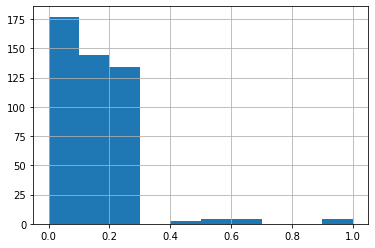

In [25]:
df_dual['Propensity'] = classifier.predict_proba(X_dual)[:,1].round(1)
df_dual['Propensity'].hist()

##### Neural Network (99.6% accuracy )[Non-scaled data]

In [26]:
# Neural network with non-scaled data
# X_train, X_test, y_train, y_test  =   train_test_split(X_dual, Y_dual, test_size=.2)
# classifier = Sequential()
# classifier.add(Dense(240, kernel_initializer = 'uniform', activation = 'relu'))
# classifier.add(Dropout(0.1,seed=12))
# classifier.add(Dense(120, kernel_initializer = 'uniform', activation = 'relu'))
# classifier.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))
# classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# classifier.fit(X_train, y_train, batch_size = 60, epochs = 20)
# df_dual['Propensity'] = classifier.predict(X_dual).round(1)
# df_dual['Propensity'].hist()


##### Neural Network (99.6% accuracy )[Scaled data]

In [27]:
# Neural network with scaled data
# X_train, X_test, y_train, y_test  =   train_test_split(scaled_data, Y_dual, test_size=.2)
# classifier = Sequential()
# classifier.add(Dense(240, kernel_initializer = 'uniform', activation = 'relu'))
# classifier.add(Dropout(0.1,seed=12))
# classifier.add(Dense(120, kernel_initializer = 'uniform', activation = 'relu'))
# classifier.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))
# classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# classifier.fit(X_train, y_train, batch_size = 60, epochs = 20)
# df_dual['Propensity'] = classifier.predict(scaled_data).round(1)
# df_dual['Propensity'].hist()
# #Less spread of probability values which resemble better the real case (only 99 customers bought a solution the year prior)

### Eligibility Model 

Once we got the propensity scores for each client , what remained to be done was to develop strategies related to the timing of contact.

First we created the dataframes structured in months, adding columns filled with 0 in copies of the dataframes.\
At this point we had to carry out the second grouping required, that was to divide the customers according to the method according to which they will be contacted. We first relied on the 'PHONE_VALIDATED' and 'MAIL_VALIDATED' columns, thus creating four groups:
- customers to which a cross selling will be offered by mail
- customers to which a cross selling will be offered by sms or phone call
- customers to which a dual solution will be offered by mail
- customers to which a dual solution will be offered by sms or phone call

These groups are represented in the bargraph below, and they are also intersecated, since some customers can be reached both by phone and mail.\
Before computing the strategy, we kept the dataframes only with the months columns, the customers ID, and their propensity score.

In [28]:
#Adding months columns for final output and allocation of strategies
dfmonth_dual=df_dual.copy()
dfmonth_dual[['Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12']]=0
dfmonth_cross=df_cross.copy()
dfmonth_cross[['Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12']]=0


#### Creating the dataframes needed to split up the consumers

In [29]:
df_dual_both=dfmonth_dual[dfmonth_dual['PHONE_VALIDATED']=='OK'] 
df_dual_both=df_dual_both[df_dual_both['EMAIL_VALIDATED']==1] #Dual Customers who have given consent to both mails and phone communications
df_dual_mail=dfmonth_dual[dfmonth_dual['PHONE_VALIDATED']=='KO'] #Dual Customers with no consent for mail communications
df_dual_phone=dfmonth_dual[dfmonth_dual['EMAIL_VALIDATED']==0] #Dual Customers with no consent for phone communications
df_cross_both=dfmonth_cross[dfmonth_cross['PHONE_VALIDATED']=='OK']
df_cross_both=df_cross_both[df_cross_both['EMAIL_VALIDATED']==1]#Cross Customers who have given consent to both mails and phone communications
df_cross_mail=dfmonth_cross[dfmonth_cross['PHONE_VALIDATED']=='KO']#Cross Customers with no consent for phone communications
df_cross_phone=dfmonth_cross[dfmonth_cross['EMAIL_VALIDATED']==0]#Cross Customers with no consent for mail communications
frames1=[df_cross_both,df_cross_mail]
crossmail = pd.concat(frames1)#Dataframe for cross selling by mail
frames2=[df_cross_both,df_cross_phone]
crosssms_tls=pd.concat(frames2) #Dataframe for cross selling by phone (sms and tls) 
frames3=[df_dual_both,df_dual_mail]
solmail=pd.concat(frames3) #Dataframe for solution selling by mail
frames4=[df_dual_both,df_dual_phone]
solsms_tls=pd.concat(frames4) #Dataframe for solution selling by phone (sms and tls)


#### Count of number of clients for each initial dataframe split by consensus given 

In [30]:
v1=len(crosssms_tls)
v2=len(crossmail)
v3=len(solsms_tls)
v4=len(solmail)
l=[v1,v2,v3,v4]
l.sort()
columns=['cross_sms_tls','cross_mail','solution_sms_tls','solution_mail']
dizionario={'#clients':l,'typology':columns}
a=pd.DataFrame(dizionario)
fig= px.bar(a, x = 'typology', y = '#clients', color = 'typology', title = 'Customers divided by consent groups',text_auto=True)
fig.update_layout(xaxis_tickangle=90, xaxis_title = 'Type of clients')
fig.update_layout(uniformtext_minsize=0.4)
fig.show()
#This is an interactive graph by pressing one of the buttons in the legend you can add or remove groups of the chart

In [31]:
#Dropping unnecessary columns 
crossmail=crossmail.drop(crossmail.iloc[:,1:-13],axis=1)
crosssms_tls=crosssms_tls.drop(crosssms_tls.iloc[:,1:-13],axis=1)
solmail=solmail.drop(solmail.iloc[:,1:-13],axis=1)
solsms_tls=solsms_tls.drop(solsms_tls.iloc[:,1:-13],axis=1)


### Dataframes separation by propensity score (High,Medium,Low)

In this section we exploited the propensity score to divide the customers in 3 different classes, separating them according to their propensity valuethat we assumed to be high if Propensity>0.5, medium if 0.2< Propensity< 0.5, and low if Propensity <0.2.\
This separation was applied to the dataframe splitted as described in the previous steps, since we had strict rule to follow when elaborating the contact strategies.

In [32]:
#for cross dem csv
demhigh=crossmail[crossmail['Propensity']>0.5]
demmedium=crossmail[crossmail['Propensity']<0.5]
demmedium=demmedium[demmedium['Propensity' ]>0.2]
demlow=crossmail[crossmail['Propensity']<0.2]

#for cross sms csv
smshigh=crosssms_tls[crosssms_tls['Propensity']>0.5]
smsmedium=crosssms_tls[crosssms_tls['Propensity']<0.5]
smsmedium=smsmedium[smsmedium['Propensity' ]>0.2]
smslow=crosssms_tls[crosssms_tls['Propensity']<0.2]

#for cross tls csv
tlshigh=crosssms_tls[crosssms_tls['Propensity']>0.5]
tlsmedium=crosssms_tls[crosssms_tls['Propensity']<0.5]
tlsmedium=tlsmedium[tlsmedium['Propensity' ]>0.2]
tlslow=crosssms_tls[crosssms_tls['Propensity']<0.2]

#for sol dem csv 
soldemhigh=solmail[solmail['Propensity']>0.5]
soldemmedium=solmail[solmail['Propensity']<0.5]
soldemmedium=soldemmedium[soldemmedium['Propensity' ]>0.2]
soldemlow=solmail[solmail['Propensity']<0.2]

#for sol sms
solsmshigh=solsms_tls[solsms_tls['Propensity']>0.5]
solsmsmedium=solsms_tls[solsms_tls['Propensity']<0.5]
solsmsmedium=solsmsmedium[solsmsmedium['Propensity' ]>0.2]
solsmslow=solsms_tls[solsms_tls['Propensity']<0.2]

#for sol tls 
soltlshigh=solsms_tls[solsms_tls['Propensity']>0.5]
soltlsmedium=solsms_tls[solsms_tls['Propensity']<0.5]
soltlsmedium=soltlsmedium[soltlsmedium['Propensity' ]>0.2]
soltlslow=solsms_tls[solsms_tls['Propensity']<0.2]

### Functions to allocate the communication strategies per month 

The strategies elaborated for the diffeent groups are the following:

##### High propensity
- Optimal for Cross customers DEM&SMS (Propensity >0.5)--> One contact with each channel every 2 months
- Optimal for Cross customers TLS (Propensity>0.5)--> One call in the month after a DEM&SMS contact and another one 6 months later
- Optimal for Solution customers DEM&SMS (Propensity>0.5) --> For each channel one random contact in the year and then in a random month after at least two months
- Optimal for Solution customers TLS (Propensity >0.5)--> One call random call without overlapping with contacts\

##### Medium propensity
- Strategy for Cross customers  DEM&SMS (0.2< Propensity score <0.5 )--> One contact with both channels every 3 months
- Strategy for Cross customers TLS (0.2< Propensity score <0.5 )-- >One call in months with no contact
- Strategy for Solution customers  DEM&SMS (0.2< Propensity score <0.5 )--> For each channel one contact during the year
- Strategy for Solution  customers TLS (0.2< Propensity score <0.5 ) --> One call a month after the first contact by sms or dem

##### Low propensity
- Strategy for Cross customers  DEM&SMS (Propensity score <0.2) --> one contact every four months
- Strategy for Cross customers TLS (Propensity score <0.2)--> No call (for avoiding churn)
- Strategy for Solution customers  DEM&SMS (Propensity score <0.2) --> Just one random contact in the year with both channels
- Strategy for Solution customers TLS (Propensity score <0.2)--> No call (for avoiding churn)

We created these strategies appliyng to each dataframe specific functions, keeping in mind that sms and mail can be sent togheter, while the phone call should not be in the same month of the other contact methods, so these functions take care also of the concatenation with the dataframe regarding sms contacts.\
The number of contacts for method and for groups are fixed, while the specific month can change due to the random indexes selected by  the functions.\
With this structure we didn't need to build a function for each specific group, since some of them are usable in two of the groups (for istance month_1, one contact for year at random with dem or sms).

In [33]:
#optimal for Cross customers dem & sms (Propensity >0.5)-->one contact with each channel every 2 months 
def months_6(df):
    for el in range (0, len(df['ID'])):
        i = 2
        while i < 14:
            df.iloc[el, i]=1
            i += 2
    return(df)

#optimal for Cross customers tls after first function (Propensity>0.5)-->one call in the month after a DEM&SMS contact and another one 6 months later
def tel_2(df2, df3):
    common_items=set(df2['ID']).intersection(set(df3['ID']))
    row=0
    for id in df2['ID']:
        i = random.randint(2,7)
        if id in common_items:
            while i < 14:
                if df3.iloc[row,i]==1:
                    df2.iloc[row,i]=0
                    i += 1
                else:
                    df2.iloc[row, i]=1
                    i+=6
            row+=1
        else:
            df2.iloc[row, i]=1
            i+=6
            row+=1
    return(df2)

#optimal for Solution customers dem & sms (Propensity>0.5) --> one contact with one of the two channels randomly in the year and then in a random month after at least two months
def months_2(df):
    for el in range (0, len(df['ID'])):
        i = random.randint(2,10)
        df.iloc[el, i]=1
        i += 2
        e = random.randint(i,13)
        df.iloc[el, e]=1
    return (df)

#optimal for sol tls after previous function (Propensity >0.5)-->one call random call without overlapping with contacts
def tel1(df2, df3):
    common_items=set(df2['ID']).intersection(set(df3['ID']))
    row=0
    for x in df2['ID']:
        i = random.randint(2,14) #colonne 
        if x in common_items:
            while i < 14:
                if df3.iloc[row, i]==1:
                    df2.iloc[row,i]==0
                    i += 1
                else:
                    df2.iloc[row, i]=1   
                    row+=1
                    break
        else:
            df2.iloc[row, i]=1
            row+=1
    return(df2)

#Strategy for Cross customers  DEM&SMS (Propensity score >0.5 and <0.2)-->one contact with both channels every 3 months
def months_4(df):
    for el in range (0, len(df['ID'])):
        i = random.randint(2,4)
        while i < 14:
            df.iloc[el, i]=1
            i += 3
    return (df)

#Strategy for Cross customers TLS (Propensity score >0.5 and <0.2)-->one call in months with no contact

#Strategy for Solution customers  DEM&SMS (Propensity score >0.5 and <0.2)-->one contact with one of the channels during the year and onther one with the other ,we exclude the last month for allowing the concatenation of this strategy with that of solution tls for medium propensity score (contacting the month after)
def month_1(df):
    for el in range (0, len(df['ID'])):
        i = random.randint(2,12)
        df.iloc[el, i]=1
    return (df)

#Strategy for Solution  customers TLS (Propensity score >0.5 and <0.2) --> one call a month after the first contact by sms or dem

def telonemonthlater(df2,df3):
    common_items=set(df2['ID']).intersection(set(df3['ID']))
    row=0
    for id in df2['ID']: 
        if id in common_items:
            for col in range(2,len(df2.columns)-1):
                if df3.iloc[row, col]==1:
                    df2.iloc[row,col+1]=1
                else:
                    df2.iloc[row, col+1]=0  
        row+=1
    return(df2)

#Strategy for Cross customers  DEM&SMS (Propensity score <0.2) --> one contact every four months
def months_3(df):
    for el in range (0, len(df['ID'])):
        i = random.randint(2,6)
        df.iloc[el, i]=1
        while i < 14:
            df.iloc[el, i]=1
            i += 4
    return (df)

#Strategy for Cross customers TLS (Propensity score <0.2)--> No call (for avoiding churn)

#Strategy for Solution customers  DEM&SMS (Propensity score <0.2) --> Just one random contact in the year with one of the two channels and then another with the other channel without overlapping
#Apply function month_1 

#Strategy for Solution customers TLS (Propensity score <0.2)--> No call (for avoiding churn)



#### Inserting monthly strategies for each group

In [34]:
demhigh=months_6(demhigh)
#high score cross mail
smshigh=months_6(smshigh)
#high score cross sms
tlshigh=tel_2(tlshigh,smshigh)
#high score cross tls
soldemhigh=months_2(soldemhigh)
#high score sol mail
solsmshigh=months_2(solsmshigh)
#high score sol sms
soltslshigh=tel1(soltlshigh,solsmshigh)
#medium score cross dem 
demmedium=months_4(demmedium)
#medium score cross mail
smsmedium=months_4(smsmedium)
#medium score cross sms
tlsmedium=tel1(tlsmedium, smsmedium)
#medium score cross tls
soldemmedium=month_1(soldemmedium)
#medium score solution dem
solsmsmedium=month_1(solsmsmedium)
#medium score solution sms
soltlsmedium=telonemonthlater(soltlsmedium, solsmsmedium)
#medium score solution sms
demlow=months_3(demlow)
#low score cross mail
smslow=months_3(smslow)
#low score cross sms
soldemlow=month_1(soldemlow)
#low score sol mail
solsmslow=month_1(solsmslow)
#low score solution sms

### Concatenating,ordering by ID and esporting different groups into csv files

After the applying the functions to their specific group, the last step was to concatenate the classes of customers, aggregating the datasets previously splitted by score, to obtain the final 6 csv, composed by the months columns and the ID to identify the customers (that we sorted to facilitate the order correspondence in the different files):
- Cross_Selling_DEM.csv
- Cross_Selling_SMS.csv
- Cross_Selling_TLS.csv
- Solution_DEM.csv
- Solution_SMS.csv
- Solution_TLS.csv

In [35]:
Cross_DEM=pd.concat([demhigh,demmedium,demlow]).sort_values(by='ID').drop('Propensity',axis=1)
Cross_DEM.to_csv('Cross_Selling_DEM.csv')
Cross_SMS=pd.concat([smshigh,smsmedium,smslow]).sort_values(by='ID').drop('Propensity',axis=1)
Cross_SMS.to_csv('Cross_Selling_SMS.csv')
Cross_TLS=pd.concat([tlshigh,tlsmedium,tlslow]).sort_values(by='ID').drop('Propensity',axis=1)
Cross_TLS.to_csv('Cross_Selling_TLS.csv')
Solution_DEM=pd.concat([soldemhigh,soldemmedium,soldemlow]).sort_values(by='ID').drop('Propensity',axis=1)
Solution_DEM.to_csv('Solution_DEM.csv')
Solution_SMS=pd.concat([solsmshigh,solsmsmedium,solsmslow]).sort_values(by='ID').drop('Propensity',axis=1)
Solution_SMS.to_csv('Solution_SMS.csv')
Solution_TLS=pd.concat([soltlshigh,soltlsmedium,soltlslow]).sort_values(by='ID').drop('Propensity',axis=1)
Solution_TLS.to_csv('Solution_TLS.csv')